In [9]:
import os
import re
import json
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys



Processing experiment type: clip
Using folder: clip_2025-04-12_06-51-21 (Timestamp: 2025-04-12 06:51:21)
Aggregated Metrics Report:
{
  "accuracy": {
    "accuracyAt1": 0.19298245614035087,
    "accuracyAt3": 0.42105263157894735,
    "accuracyAt5": 0.543859649122807,
    "accuracyAt10": 0.7017543859649122
  },
  "recall": {
    "recallAt1": 0.0002124161944368493,
    "recallAt3": 0.0007099977012671722,
    "recallAt5": 0.0011255744567644623,
    "recallAt10": 0.0021655054740501627
  },
  "map": {
    "mapAt1": 0.19298245614035087,
    "mapAt3": 0.283625730994152,
    "mapAt5": 0.31291423001949314,
    "mapAt10": 0.31837701617359093
  },
  "precision": {
    "precisionAt1": 0.19298245614035087,
    "precisionAt3": 0.2222222222222222,
    "precisionAt5": 0.22105263157894736,
    "precisionAt10": 0.21929824561403508
  }
}
Plotting accuracy metrics...


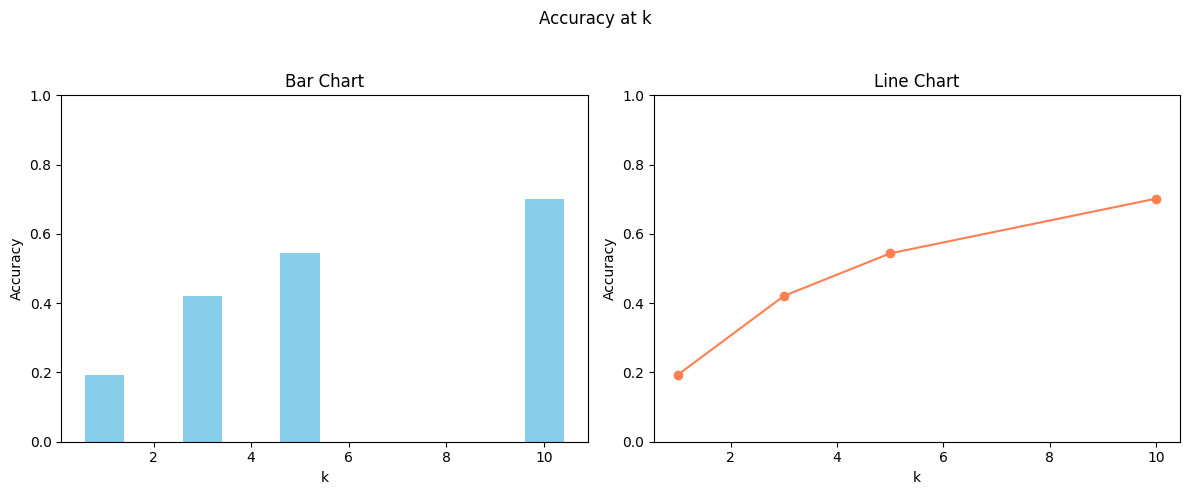

Plotting recall metrics...


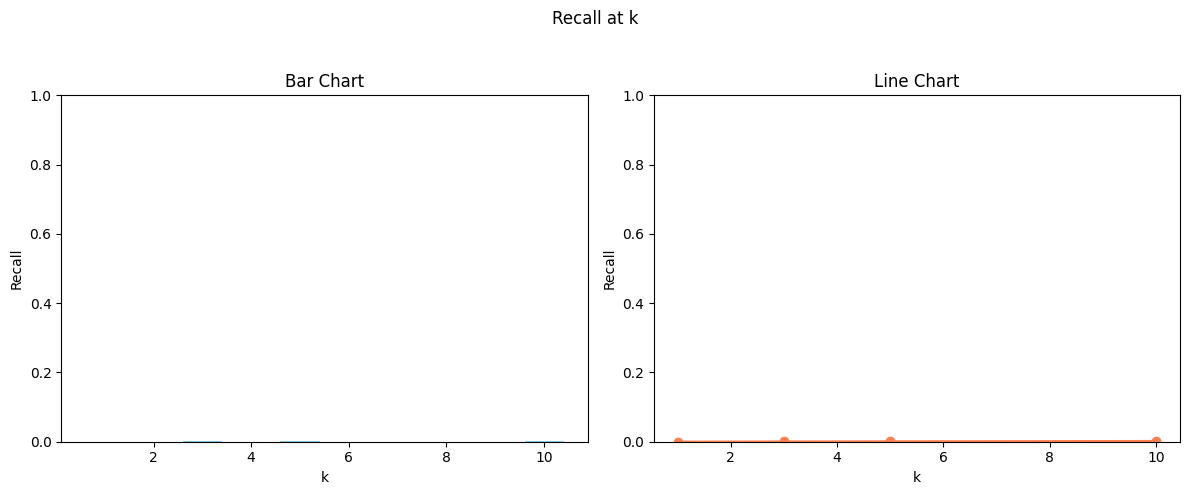

Plotting map metrics...


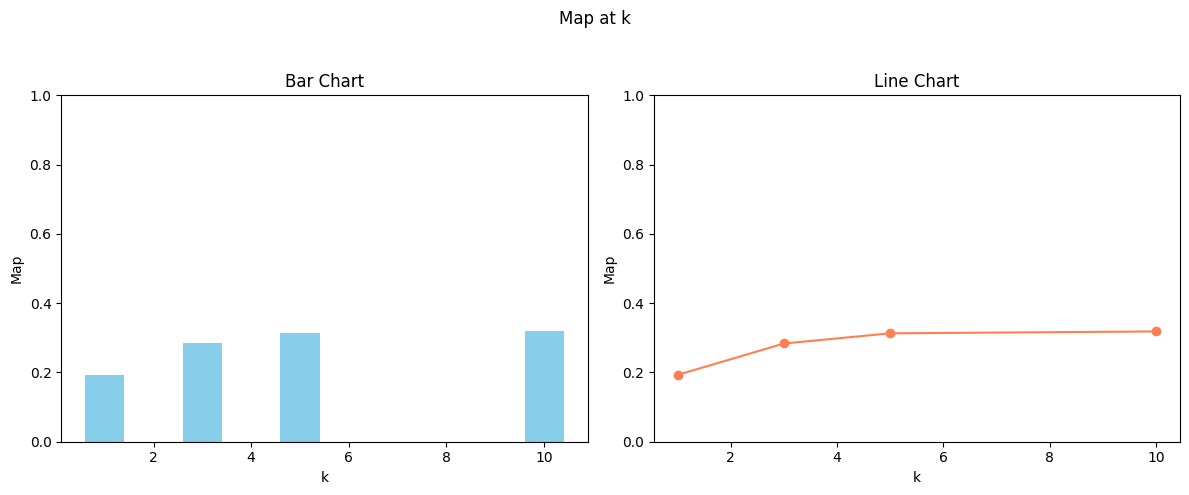

Plotting precision metrics...


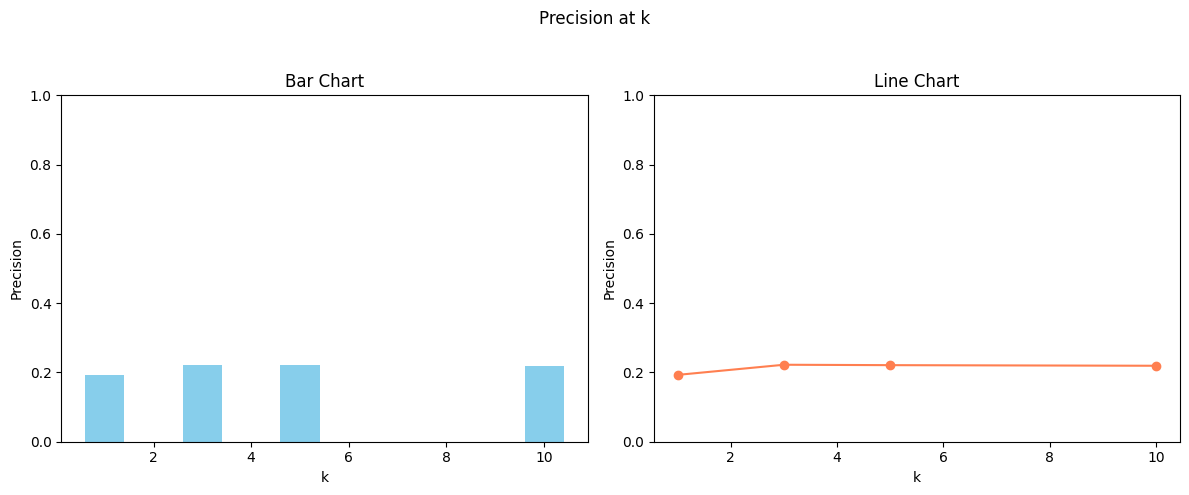


Processing experiment type: dino
Using folder: dino_2025-04-12_06-50-05 (Timestamp: 2025-04-12 06:50:05)
Error loading ../local_experiments/dino_2025-04-12_06-50-05/map_at_k_results.json: [Errno 2] No such file or directory: '../local_experiments/dino_2025-04-12_06-50-05/map_at_k_results.json'
Aggregated Metrics Report:
{
  "accuracy": {
    "accuracyAt1": 0.43859649122807015,
    "accuracyAt3": 0.6491228070175439,
    "accuracyAt5": 0.7192982456140351,
    "accuracyAt10": 0.8245614035087719
  },
  "recall": {
    "recallAt1": 0.0004295928234110948,
    "recallAt3": 0.0012887029803735695,
    "recallAt5": 0.002076509675006956,
    "recallAt10": 0.00405025837918499
  },
  "precision": {
    "precisionAt1": 0.43859649122807015,
    "precisionAt3": 0.4327485380116959,
    "precisionAt5": 0.424561403508772,
    "precisionAt10": 0.41754385964912283
  }
}
Plotting accuracy metrics...


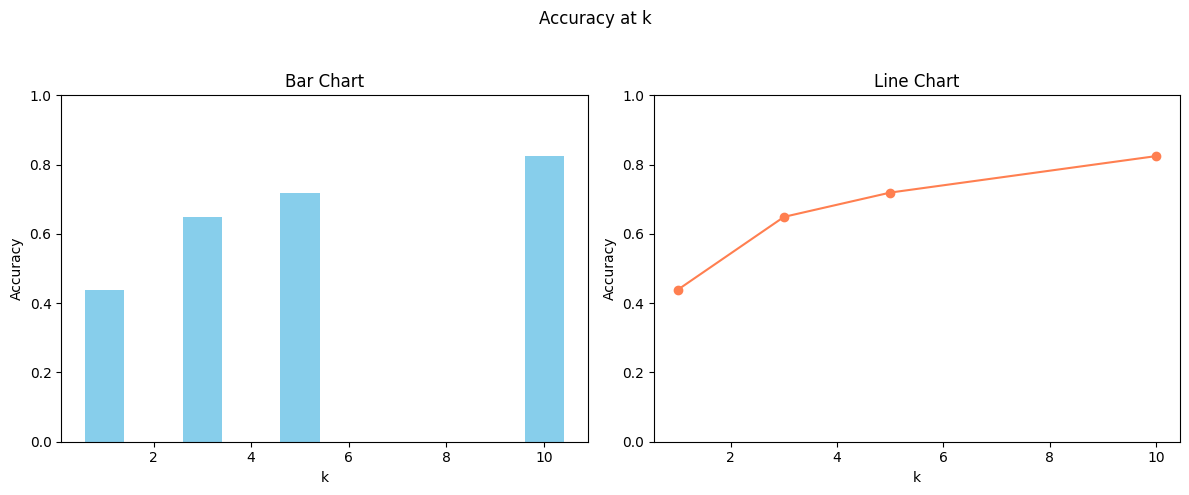

Plotting recall metrics...


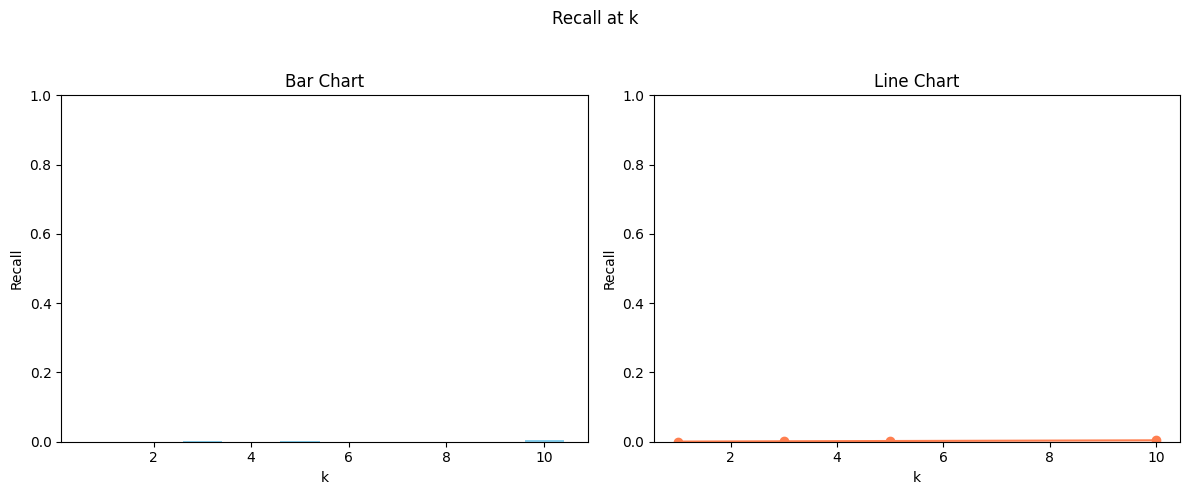

Plotting precision metrics...


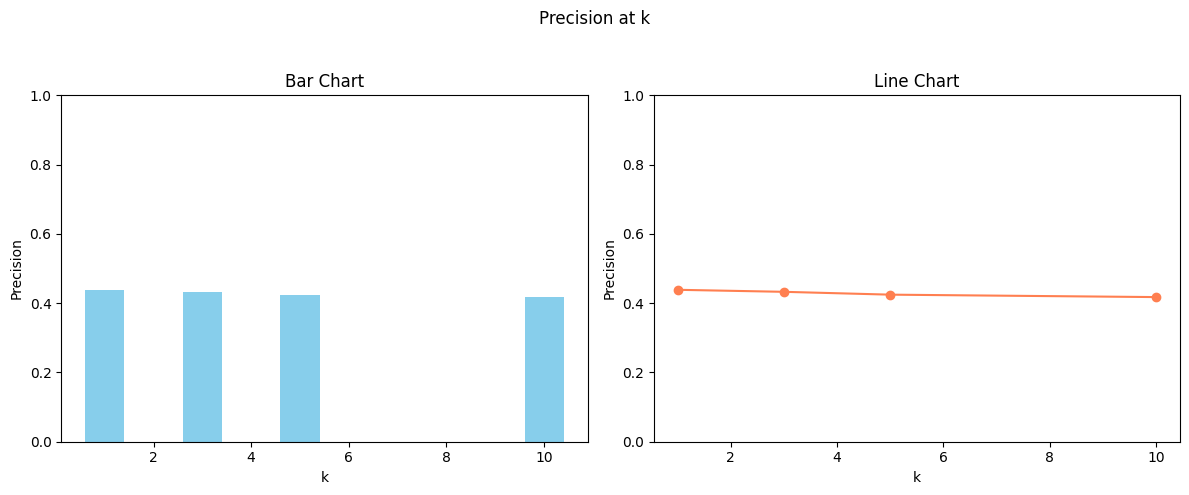


Processing experiment type: resnet50
Using folder: resnet50_2025-04-12_06-48-52 (Timestamp: 2025-04-12 06:48:52)
Aggregated Metrics Report:
{
  "accuracy": {
    "accuracyAt1": 0.2807017543859649,
    "accuracyAt3": 0.543859649122807,
    "accuracyAt5": 0.5789473684210527,
    "accuracyAt10": 0.7719298245614035
  },
  "recall": {
    "recallAt1": 0.0003148876506572324,
    "recallAt3": 0.0010914894866931844,
    "recallAt5": 0.0015603016208314434,
    "recallAt10": 0.0029911764487582843
  },
  "map": {
    "mapAt1": 0.2807017543859649,
    "mapAt3": 0.3961988304093567,
    "mapAt5": 0.39602826510721245,
    "mapAt10": 0.39255449580741986
  },
  "precision": {
    "precisionAt1": 0.2807017543859649,
    "precisionAt3": 0.32748538011695905,
    "precisionAt5": 0.2877192982456141,
    "precisionAt10": 0.28245614035087724
  }
}
Plotting accuracy metrics...


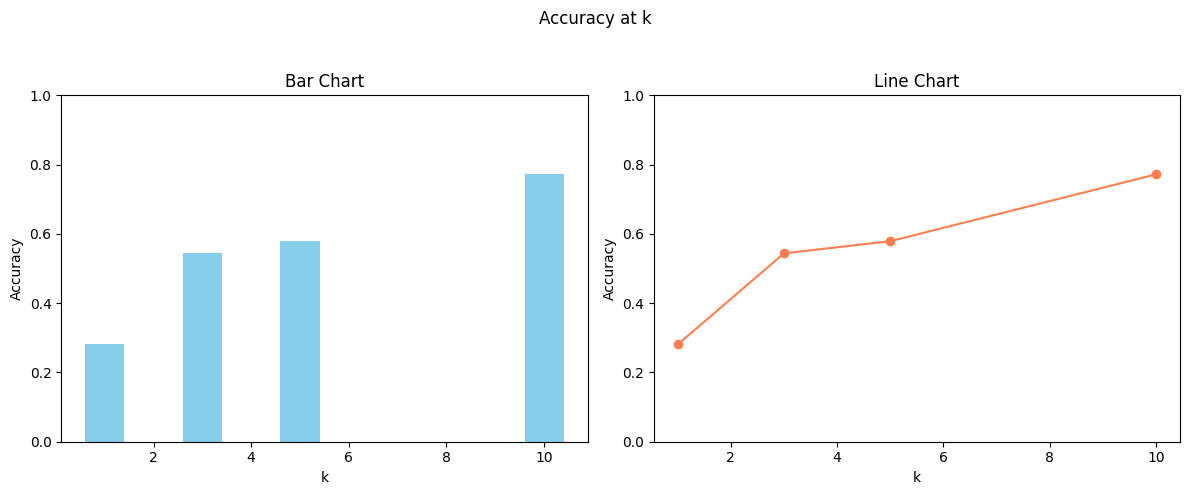

Plotting recall metrics...


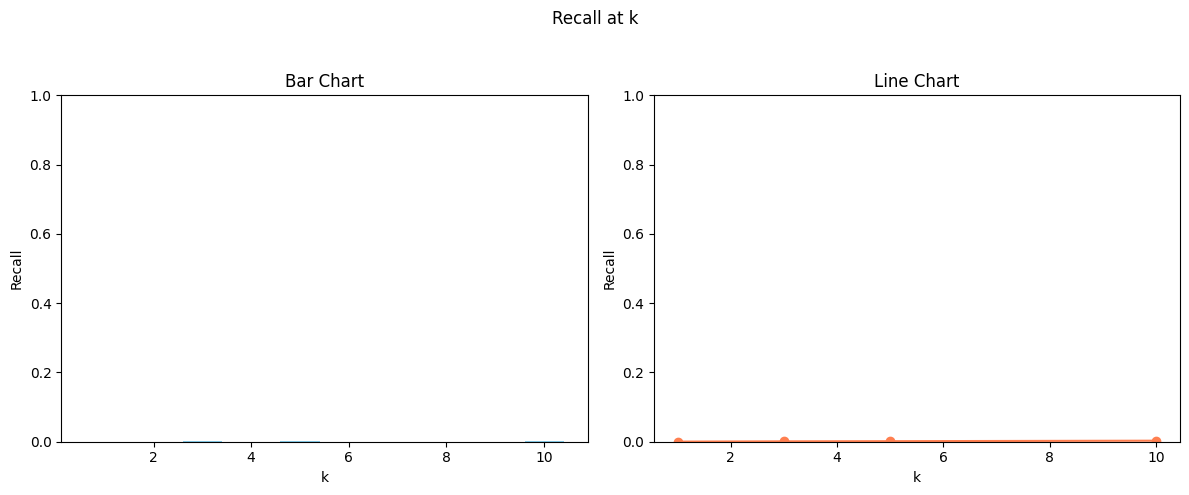

Plotting map metrics...


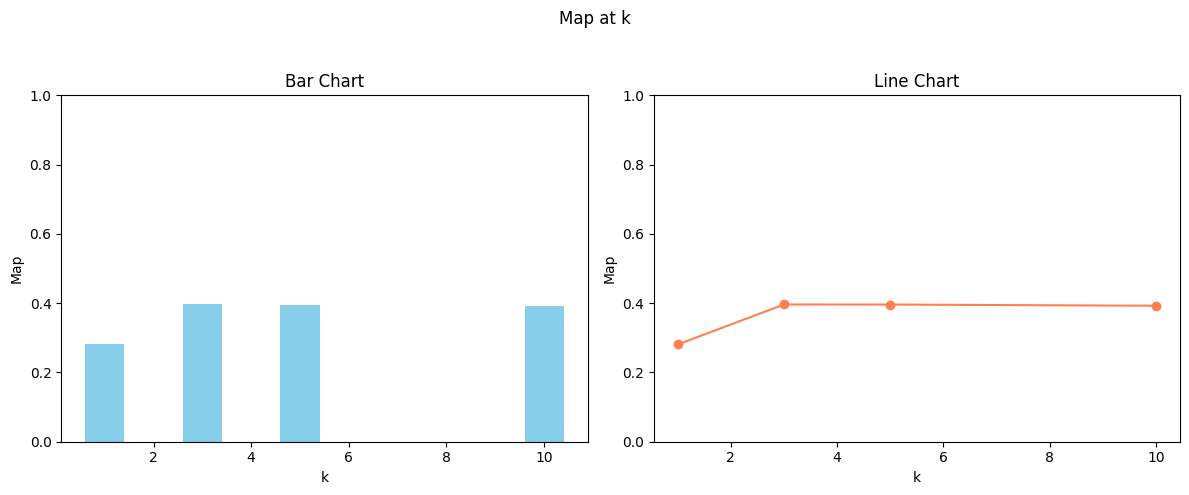

Plotting precision metrics...


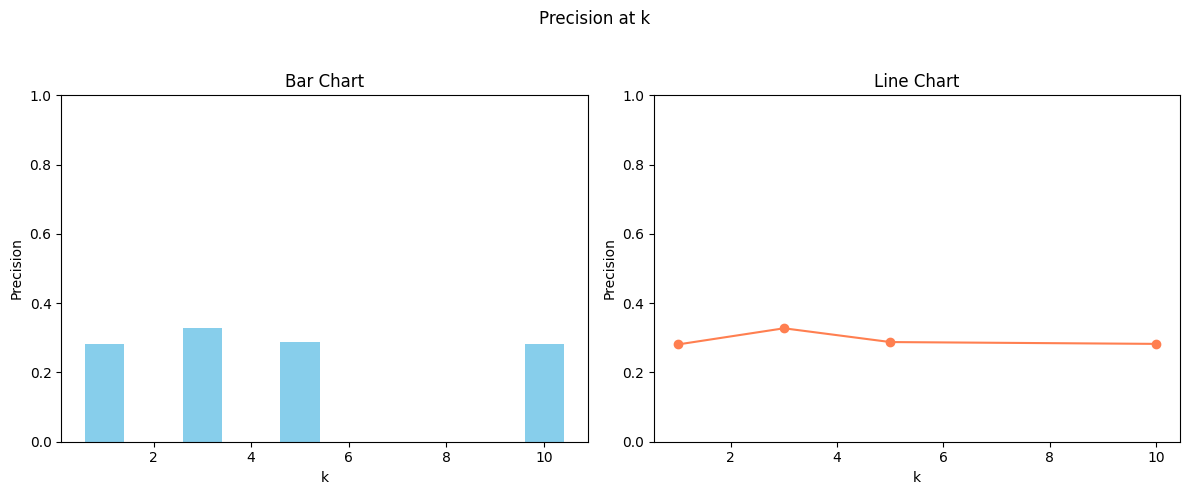


Processing experiment type: vit
Using folder: vit_2025-04-12_06-46-15 (Timestamp: 2025-04-12 06:46:15)
Error loading ../local_experiments/vit_2025-04-12_06-46-15/accuracy_at_k_results.json: [Errno 2] No such file or directory: '../local_experiments/vit_2025-04-12_06-46-15/accuracy_at_k_results.json'
Error loading ../local_experiments/vit_2025-04-12_06-46-15/recall_at_k_results.json: [Errno 2] No such file or directory: '../local_experiments/vit_2025-04-12_06-46-15/recall_at_k_results.json'
Error loading ../local_experiments/vit_2025-04-12_06-46-15/precision_at_k_results.json: [Errno 2] No such file or directory: '../local_experiments/vit_2025-04-12_06-46-15/precision_at_k_results.json'
Aggregated Metrics Report:
{
  "map": {
    "mapAt1": 0.22807017543859648,
    "mapAt3": 0.2850877192982456,
    "mapAt5": 0.3094541910331384,
    "mapAt10": 0.30686418979547636
  }
}
Plotting map metrics...


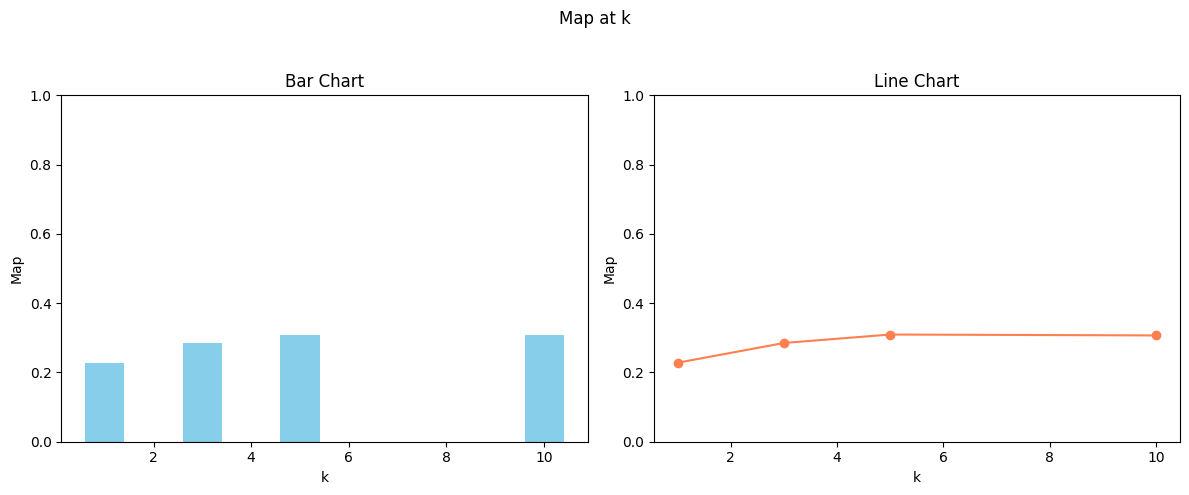

In [8]:


# Path to the base experiments folder
BASE_DIR = "../local_experiments"

# Define the filenames for the compiled results for each metric.
# Adjust the filenames if necessary (e.g., add the .json extension if your files are named with it)
metrics_files = {
    "accuracy": {
        "compiled": "accuracy_at_k_results.json",
        "details": "accuracy_at_k_query_details.json"
    },
    "recall": {
        "compiled": "recall_at_k_results.json",
        "details": "recall_at_k_query_details.json"
    },
    "map": {
        "compiled": "map_at_k_results.json",
        "details": "map_at_k_query_details.json"
    },
    "precision": {
        "compiled": "precision_at_k_results.json",
        "details": "precision_at_k_query_details.json"
    }
}

# Regular expression to extract experiment type and timestamp from folder names.
# Expected format: <experiment_type>_<YYYY-MM-DD_HH-MM-SS>
timestamp_pattern = re.compile(r"(.*)_(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})$")

def parse_experiment_folder(folder_name):
    """
    Parse an experiment folder name into (experiment_type, timestamp)
    """
    match = timestamp_pattern.match(folder_name)
    if match:
        experiment_type = match.group(1)
        timestamp_str = match.group(2)
        timestamp = datetime.strptime(timestamp_str, "%Y-%m-%d_%H-%M-%S")
        return experiment_type, timestamp
    return None, None

def get_latest_experiments(base_dir, specific_experiments=None):
    """
    Scan the base directory for experiment folders, group by experiment type,
    and return a dictionary with the most recent experiment for each type.
    
    If specific_experiments is provided as a list:
      - if empty, treat it as not filtering any experiment
      - if non-empty, only use folders whose names are in that list.
    """
    experiments = {}
    for folder in os.listdir(base_dir):
        full_path = os.path.join(base_dir, folder)
        if os.path.isdir(full_path):
            # If filtering by a provided list and it is non-empty, skip if not in list.
            if specific_experiments is not None and len(specific_experiments) > 0 and folder not in specific_experiments:
                continue

            exp_type, timestamp = parse_experiment_folder(folder)
            if exp_type is None:
                continue
            # Keep the most recent experiment per experiment type.
            if exp_type not in experiments or timestamp > experiments[exp_type]["timestamp"]:
                experiments[exp_type] = {"folder": folder, "timestamp": timestamp, "path": full_path}
    return experiments

def load_json_file(file_path):
    """
    Utility function to load a JSON file.
    """
    try:
        with open(file_path, "r") as f:
            return json.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def aggregate_metrics(exp_path):
    """
    Load all compiled metric JSON files from a given experiment folder.
    Returns a dictionary with keys: 'accuracy', 'recall', 'map', 'precision'.
    """
    aggregated = {}
    for metric, files in metrics_files.items():
        file_path = os.path.join(exp_path, files["compiled"])
        data = load_json_file(file_path)
        if data is not None:
            aggregated[metric] = data
    return aggregated

def plot_metric(metric_data, metric_name):
    """
    Create a bar chart and a line chart for the metric at different k values.
    Expects the keys in metric_data to follow the pattern: 
    e.g. for accuracy: "accuracyAt1", "accuracyAt3", etc.
    """
    ks = []
    values = []
    # Build a regex based on the metric name. For example, 'accuracyAt(\d+)'.
    pattern = re.compile(fr"{metric_name}At(\d+)", re.IGNORECASE)
    for key, value in metric_data.items():
        m = pattern.match(key)
        if m:
            k = int(m.group(1))
            ks.append(k)
            values.append(value)
    if not ks:
        print(f"No valid keys found for metric: {metric_name}")
        return

    # Sort by k values
    ks, values = zip(*sorted(zip(ks, values)))
    
    # Create a figure with two subplots: bar chart and line chart.
    fig, (ax_bar, ax_line) = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle(f"{metric_name.capitalize()} at k")
    
    # Bar chart
    ax_bar.bar(ks, values, color='skyblue')
    ax_bar.set_xlabel("k")
    ax_bar.set_ylabel(metric_name.capitalize())
    ax_bar.set_title("Bar Chart")
    ax_bar.set_ylim(0, 1)  # Set y-axis range from 0 to 1
    
    # Line chart
    ax_line.plot(ks, values, marker='o', linestyle='-', color='coral')
    ax_line.set_xlabel("k")
    ax_line.set_ylabel(metric_name.capitalize())
    ax_line.set_title("Line Chart")
    ax_line.set_ylim(0, 1)  # Set y-axis range from 0 to 1
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    
def plot_all_metrics(aggregated_metrics):
    """
    Plot bar and line charts for all metrics available in aggregated_metrics.
    """
    for metric, data in aggregated_metrics.items():
        if data is not None:
            print(f"Plotting {metric} metrics...")
            plot_metric(data, metric)
        else:
            print(f"No data available for metric: {metric}")

# ---------------------------------
# Main workflow
# ---------------------------------

# Specify a list of experiment folder names.
# Example usage:
#   - specific_experiments = []             -> process the latest experiment for each type.
#   - specific_experiments = ["exp1_folder"]  -> process only that experiment.
#   - specific_experiments = ["exp1_folder", "exp2_folder"] -> process multiple experiments.
specific_experiments = []  # Change as needed; empty list means "use latest per experiment type"

# Retrieve the experiments based on the provided filter.
latest_experiments = get_latest_experiments(BASE_DIR, specific_experiments)

if not latest_experiments:
    print("No experiments found.")
else:
    # Iterate over each experiment type and process.
    for exp_type, exp_info in latest_experiments.items():
        print(f"\nProcessing experiment type: {exp_type}")
        print(f"Using folder: {exp_info['folder']} (Timestamp: {exp_info['timestamp']})")
        
        # Aggregate the compiled metrics from the experiment folder.
        aggregated = aggregate_metrics(exp_info["path"])
        
        print("Aggregated Metrics Report:")
        print(json.dumps(aggregated, indent=2))
        
        # Plot all available metrics (accuracy, recall, map, precision)
        plot_all_metrics(aggregated)


Error loading ../local_experiments/dino_2025-04-12_06-50-05/map_at_k_results.json: [Errno 2] No such file or directory: '../local_experiments/dino_2025-04-12_06-50-05/map_at_k_results.json'


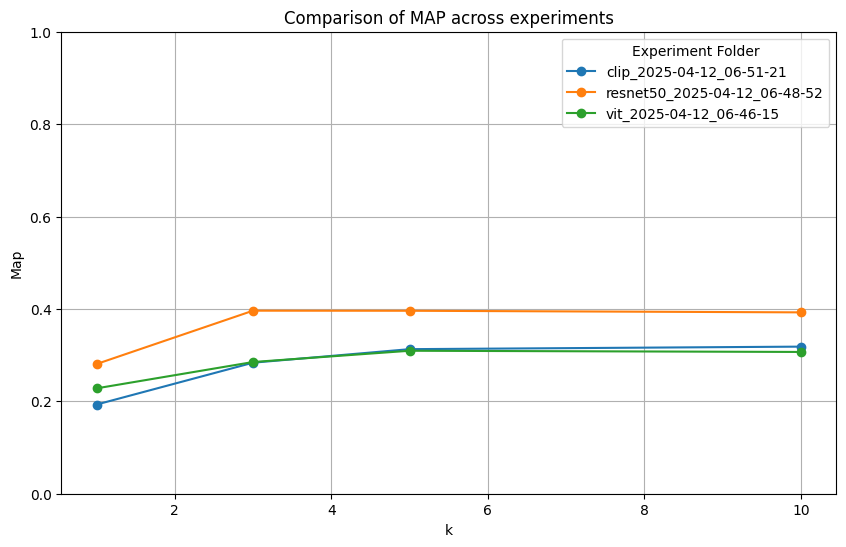

In [14]:
def plot_metric_comparison(metric_name, experiments):
    """
    Plot a comparison of a selected metric (e.g. "map") across multiple experiments.
    Each experiment's compiled metric JSON file is loaded and a line chart is generated
    with the metric values at different k values. The y-axis is fixed to [0, 1].
    
    Parameters:
        metric_name (str): The metric to plot (e.g. "map", "accuracy", "recall", "precision")
        experiments (dict): A dictionary of experiments as returned by get_latest_experiments.
                            The keys are experiment types and the values are dicts containing folder info.
    """
    import matplotlib.pyplot as plt
    import re
    # Create a new figure for comparison
    plt.figure(figsize=(10, 6))
    
    # Build a regex pattern to extract k from the keys (e.g., "mapAt1", "mapAt3", etc.)
    pattern = re.compile(fr"{metric_name}At(\d+)", re.IGNORECASE)
    
    for exp_type, exp_info in experiments.items():
        # Construct the file path for the compiled metric results for the selected metric
        file_path = os.path.join(exp_info["path"], metrics_files[metric_name]["compiled"])
        data = load_json_file(file_path)
        if not data:
            print(f"Warning: No data for {metric_name} in experiment {exp_info['folder']}")
            continue
        
        # Extract the k values and corresponding metric values
        ks = []
        values = []
        for key, value in data.items():
            m = pattern.match(key)
            if m:
                k = int(m.group(1))
                ks.append(k)
                values.append(value)
        if not ks:
            print(f"No valid keys found for metric {metric_name} in experiment {exp_info['folder']}")
            continue
        
        # Sort by k and plot the line
        ks, values = zip(*sorted(zip(ks, values)))
        plt.plot(ks, values, marker='o', label=exp_info["folder"])
    
    plt.title(f"Comparison of {metric_name.upper()} across experiments")
    plt.xlabel("k")
    plt.ylabel(metric_name.capitalize())
    plt.ylim(0, 1)  # Fix y-axis from 0 to 1
    plt.legend(title="Experiment Folder")
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming you already obtained experiments using get_latest_experiments:
# specific_experiments = []  # or a list of specific experiment folder names
# latest_experiments = get_latest_experiments(BASE_DIR, specific_experiments)
# To compare the "map" metric across these experiments:
plot_metric_comparison("map", latest_experiments)


In [13]:
import os
import json
import matplotlib.pyplot as plt

def load_json_file(file_path):
    """
    Utility function to load a JSON file.
    """
    try:
        with open(file_path, "r") as f:
            return json.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

def calculate_class_performance(query_details_file):
    """
    Calculate performance per class using the query details file.
    
    Expected JSON format:
    {
      "accuracy_at_k": <float>,
      "k": <int>,
      "correct_queries": <int>,
      "total_queries": <int>,
      "query_details": [
         {
           "query_label": <int>,
           "query_class": <str>,
           "query_path": <str>,
           "found_correct": <int>,   # 1 if correct, 0 otherwise
           "retrieved": [ ... ]
         },
         ...
      ]
    }
    
    Returns a dictionary with stats per class.
    """
    data = load_json_file(query_details_file)
    if data is None:
        return {}
    
    details = data.get("query_details", [])
    class_stats = {}
    
    for query in details:
        query_class = query.get("query_class")
        found_correct = query.get("found_correct", 0)
        if query_class not in class_stats:
            class_stats[query_class] = {"total": 0, "correct": 0, "errors": 0}
        class_stats[query_class]["total"] += 1
        class_stats[query_class]["correct"] += found_correct
        class_stats[query_class]["errors"] += (1 - found_correct)
    
    # Calculate error and accuracy rates per class.
    for cls, stats in class_stats.items():
        total = stats["total"]
        stats["error_rate"] = stats["errors"] / total if total > 0 else 0
        stats["accuracy_rate"] = stats["correct"] / total if total > 0 else 0
    
    return class_stats

def plot_class_performance(class_stats):
    """
    Plot a bar chart of error rates per class.
    """
    if not class_stats:
        print("No class statistics to plot.")
        return
    
    classes = list(class_stats.keys())
    error_rates = [class_stats[c]["error_rate"] for c in classes]
    
    plt.figure(figsize=(10, 6))
    plt.bar(classes, error_rates, color='salmon')
    plt.xlabel("Class")
    plt.ylabel("Error Rate")
    plt.title("Error Rate per Class")
    plt.ylim(0, 1)  # Fix y-axis from 0 to 1
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# ---------------------
# Example usage:
# ---------------------

# Path to the query details file. Adjust the path as necessary.
query_details_path = os.path.join("../local_experiments", "uni_foundation_pathology_2025-04-12_06-52-38", "map_at_k_query_details.json")

# Calculate performance per class.
performance = calculate_class_performance(query_details_path)

# Print the performance stats per class.
print("Performance per class:")
for cls, stats in performance.items():
    print(f"Class: {cls}")
    print(f"  Total queries: {stats['total']}")
    print(f"  Correct queries: {stats['correct']}")
    print(f"  Errors: {stats['errors']}")
    print(f"  Error rate: {stats['error_rate']:.2f}")
    print(f"  Accuracy rate: {stats['accuracy_rate']:.2f}")
    print()

# Plot the error rate per class.
plot_class_performance(performance)


Performance per class:
No class statistics to plot.
